<a href="https://colab.research.google.com/github/boscherj/tensorflow/blob/master/Chapitre_2_Keras_in_action_Boston_House_Prices_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Download the data using Keras; this will need an active internet connection
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [4]:
#Explore the data structure using basic python commands
print("Type of the Dataset:",type(y_train))
print("Shape of training data :",x_train.shape)
print("Shape of training labels :",y_train.shape)
print("Shape of testing data :",type(x_test))
print("Shape of testing labels :",y_test.shape)

Type of the Dataset: <class 'numpy.ndarray'>
Shape of training data : (404, 13)
Shape of training labels : (404,)
Shape of testing data : <class 'numpy.ndarray'>
Shape of testing labels : (102,)


In [0]:
import pandas as pd # conventional alias
from sklearn.datasets import load_boston

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [20]:
print(df.shape)

(506, 14)


In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

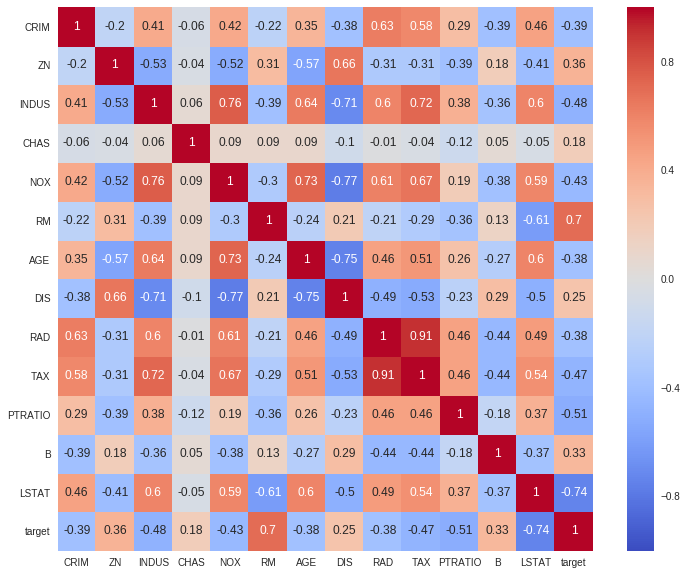

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(2),cmap='coolwarm',annot=True)

In [5]:
x_train[:3,:]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
#Extract the last 100 rows from the training data to create the validation datasets.
x_val = x_train[300:,]
y_val = y_train[300:,]

In [8]:
#Define the model architecture
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])

In [10]:
#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 104 samples
Epoch 1/3
404/404 [==============================] - 0s 625us/step - loss: 574.3743 - mean_absolute_percentage_error: 98.2644 - val_loss: 652.2599 - val_mean_absolute_percentage_error: 96.5531
Epoch 2/3
404/404 [==============================] - 0s 68us/step - loss: 533.7935 - mean_absolute_percentage_error: 92.5264 - val_loss: 578.8045 - val_mean_absolute_percentage_error: 88.0137
Epoch 3/3
404/404 [==============================] - 0s 64us/step - loss: 435.0435 - mean_absolute_percentage_error: 78.0880 - val_loss: 422.7750 - val_mean_absolute_percentage_error: 67.6216


In [11]:
results = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 53us/step


In [13]:
for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

loss  :  373.041856952742
mean_absolute_percentage_error  :  66.16243384866154


In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val,y_val))

Train on 404 samples, validate on 104 samples
Epoch 1/30
404/404 [==============================] - 0s 60us/step - loss: 269.9373 - mean_absolute_percentage_error: 54.8611 - val_loss: 224.3180 - val_mean_absolute_percentage_error: 43.6846
Epoch 2/30
404/404 [==============================] - 0s 51us/step - loss: 150.8649 - mean_absolute_percentage_error: 47.0979 - val_loss: 151.9767 - val_mean_absolute_percentage_error: 45.5802
Epoch 3/30
404/404 [==============================] - 0s 48us/step - loss: 138.3347 - mean_absolute_percentage_error: 51.8230 - val_loss: 143.2836 - val_mean_absolute_percentage_error: 41.9048
Epoch 4/30
404/404 [==============================] - 0s 49us/step - loss: 122.8649 - mean_absolute_percentage_error: 44.5851 - val_loss: 140.4280 - val_mean_absolute_percentage_error: 37.6559
Epoch 5/30
404/404 [==============================] - 0s 46us/step - loss: 115.1201 - mean_absolute_percentage_error: 41.3077 - val_loss: 130.3377 - val_mean_absolute_percentage_erro

In [15]:
results = model.evaluate(x_test, y_test)
for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

102/102 [==============================] - 0s 65us/step
loss  :  61.84064827713312
mean_absolute_percentage_error  :  29.693117291319606
